In [42]:
# 必要なライブラリを読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
% matplotlib inline

In [43]:
# csvファイル読み込み
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")

In [44]:
df_train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'Street_Grvl', 'Street_Pave', 'Utilities_AllPub',
       'Utilities_NoSeWa', 'SalePrice'],
      dtype='object', length=271)

In [45]:
#descriptive statistics summary# 目的変数を確認
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [46]:
df_train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,208500
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,181500
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,223500
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,140000
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,250000


In [14]:
#欠損数値の確認
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)
#欠損値は今回はない

,Total,Percent
SalePrice,0,0.0
Electrical_FuseA,0,0.0
Exterior1st_AsbShng,0,0.0
ExterQual_TA,0,0.0
ExterQual_Gd,0,0.0
ExterQual_Fa,0,0.0
ExterQual_Ex,0,0.0
ExterCond_TA,0,0.0
ExterCond_Po,0,0.0
ExterCond_Gd,0,0.0


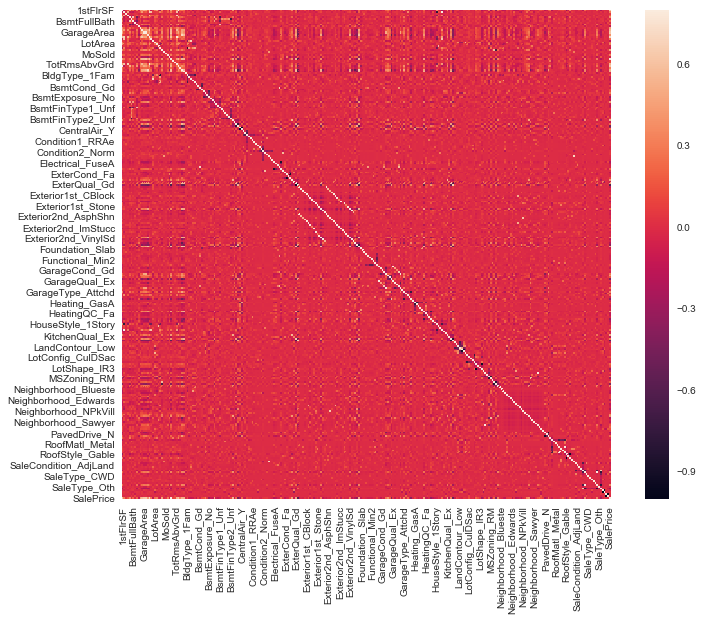

In [47]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [54]:
df_train.corr()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice
1stFlrSF,1.000000,-0.202646,0.056104,0.127401,0.445863,0.097117,0.244671,0.001956,0.317987,-0.065292,...,0.006094,-0.043721,0.221219,-0.008215,-0.198056,-0.005950,0.005950,-0.012287,0.012287,0.605852
2ndFlrSF,-0.202646,1.000000,-0.024358,0.502901,-0.137079,-0.099260,-0.169494,-0.023855,0.004469,0.061989,...,0.016175,0.012602,0.010810,-0.036082,0.026769,-0.046983,0.046983,0.020818,-0.020818,0.319334
3SsnPorch,0.056104,-0.024358,1.000000,-0.024478,0.026451,-0.029993,-0.000106,0.035114,0.020764,-0.037305,...,-0.006820,-0.006820,0.019596,-0.005279,-0.014211,-0.007473,0.007473,0.003046,-0.003046,0.044584
BedroomAbvGr,0.127401,0.502901,-0.024478,1.000000,-0.107355,-0.015728,-0.150673,0.046519,0.166643,0.041570,...,0.067108,-0.033529,-0.050702,0.025979,0.047667,-0.028865,0.028865,-0.004288,0.004288,0.168213
BsmtFinSF1,0.445863,-0.137079,0.026451,-0.107355,1.000000,-0.050117,0.649212,0.067418,-0.495251,-0.102303,...,0.022726,-0.017825,0.044883,0.010652,-0.024778,0.015643,-0.015643,0.019100,-0.019100,0.386420
BsmtFinSF2,0.097117,-0.099260,-0.029993,-0.015728,-0.050117,1.000000,0.158678,0.070948,-0.209294,0.036543,...,-0.016921,0.035715,-0.087162,-0.013098,0.036178,0.038487,-0.038487,-0.049913,0.049913,-0.011378
BsmtFullBath,0.244671,-0.169494,-0.000106,-0.150673,0.649212,0.158678,1.000000,-0.147871,-0.422900,-0.049911,...,-0.002864,-0.002864,-0.013798,0.021110,0.023746,0.050524,-0.050524,0.021467,-0.021467,0.227122
BsmtHalfBath,0.001956,-0.023855,0.035114,0.046519,0.067418,0.070948,-0.147871,1.000000,-0.095804,-0.008555,...,-0.014131,0.034992,-0.041680,-0.010939,0.026301,-0.015485,0.015485,-0.103380,0.103380,-0.016844
BsmtUnfSF,0.317987,0.004469,0.020764,0.166643,-0.495251,-0.209294,-0.422900,-0.095804,1.000000,-0.002538,...,0.001853,-0.033900,0.249236,-0.002593,-0.198960,-0.035229,0.035229,0.012639,-0.012639,0.214479
EnclosedPorch,-0.065292,0.061989,-0.037305,0.041570,-0.102303,0.036543,-0.049911,-0.008555,-0.002538,1.000000,...,-0.021064,0.042260,-0.102871,-0.016305,0.051671,-0.023082,0.023082,0.009407,-0.009407,-0.128578


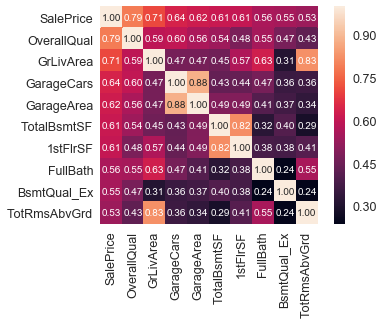

In [48]:
k = 10 #heatmapで説明変数特定
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index #nlargestからK10個
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

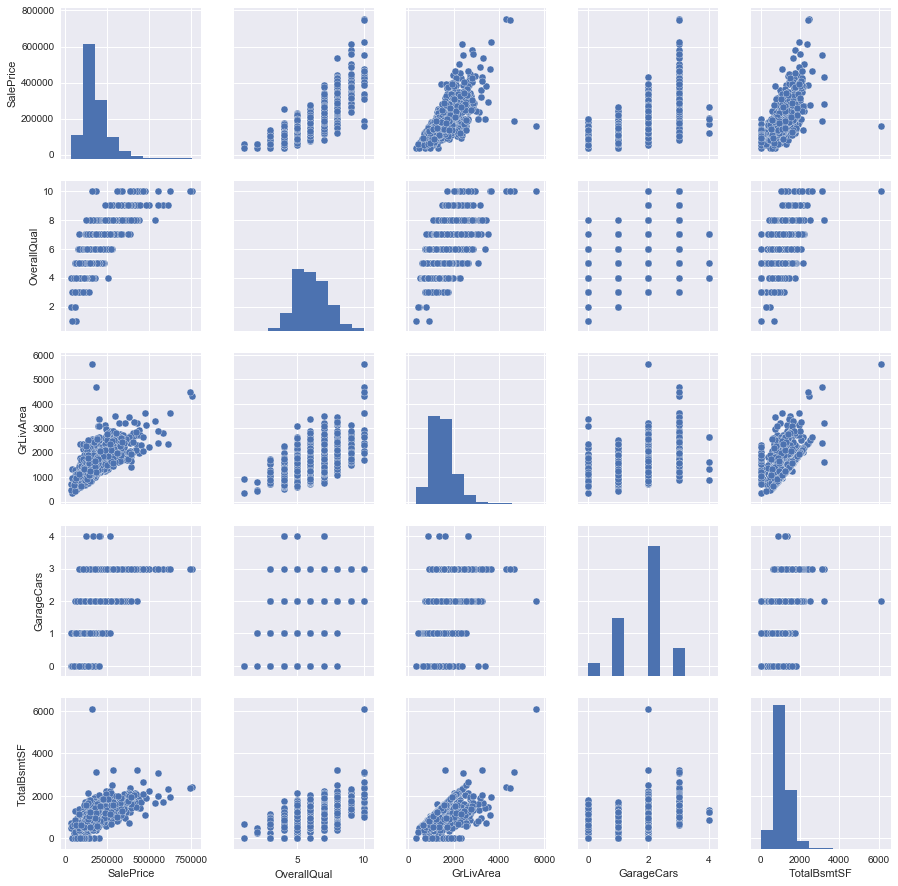

In [56]:
# 散布図行列を出力,変数は上記 cols
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();
#'GrLivArea','TotalBsmtSF'

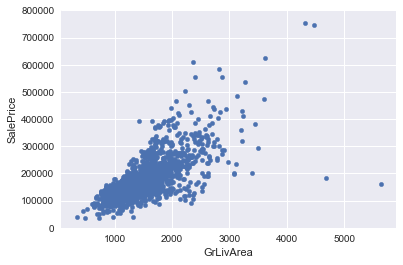

In [57]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'#GrLivAreaと価格の関係
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

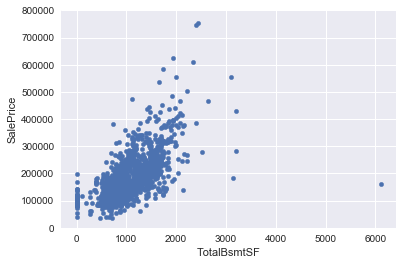

In [58]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'#TotalBsmtSFと価格の関係
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

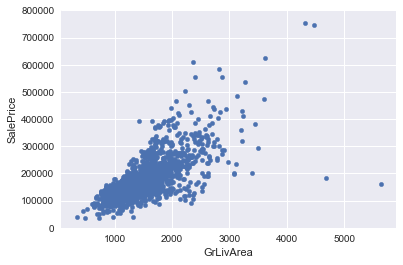

In [62]:
#二変量分析 saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

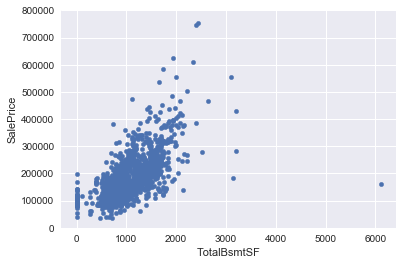

In [63]:
#二変量分析　saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

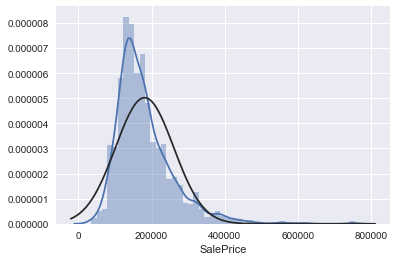

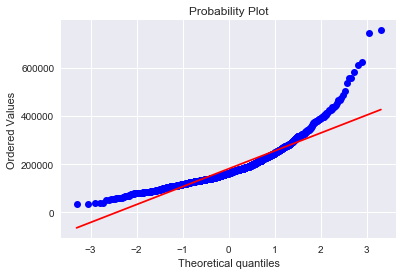

In [64]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [65]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

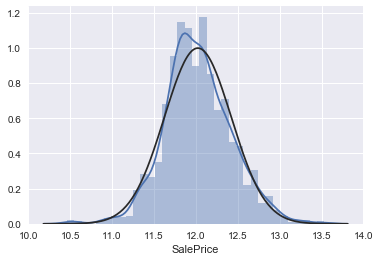

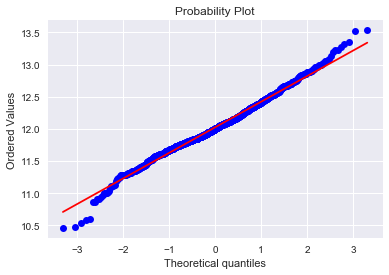

In [66]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

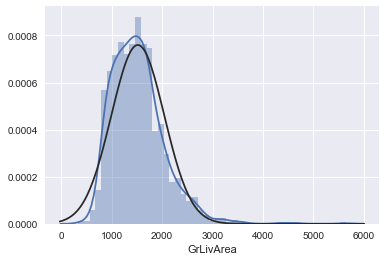

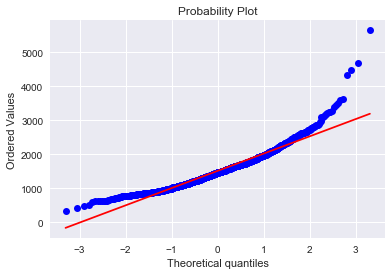

In [67]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [68]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

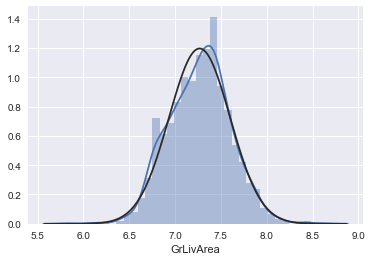

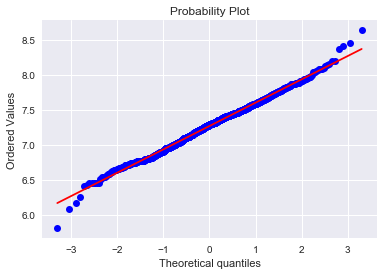

In [69]:
#ヒストグラムと正則化
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

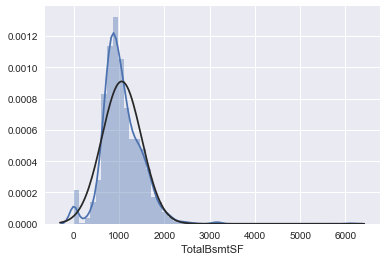

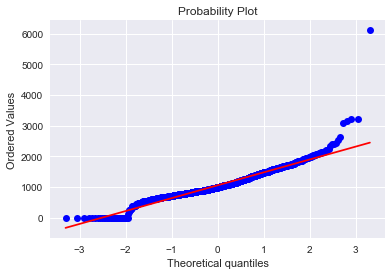

In [70]:
#ヒストグラムと正則化
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [71]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [72]:
#transform data
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

/Users/tosakanaoya/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


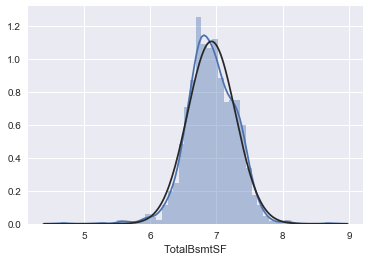

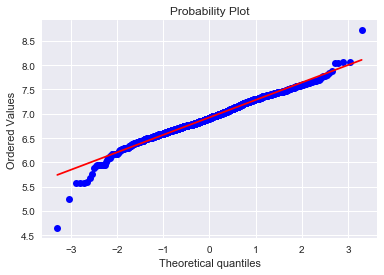

In [73]:
#ヒストグラムと正則化
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

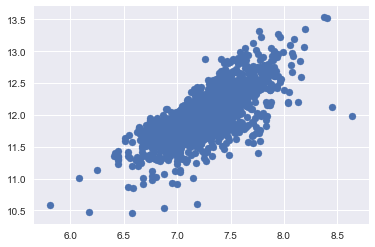

In [74]:
#散布図分布'GrLivArea'と'SalePrice'
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

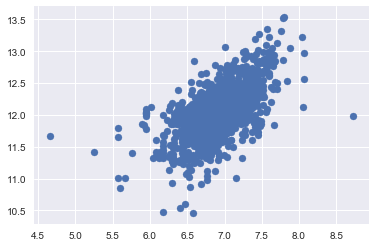

In [75]:
#散布図分布'TotalBsmtSF'と'TotalBsmtSF'
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

In [76]:
#カテゴリデータの前処理：ダミー変数化
df_train = pd.get_dummies(df_train)

In [77]:
pd.get_dummies(df_train)#ダミー変数化したあとに表示

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,SalePrice,HasBsmt
0,856.0,854.0,0.0,3.0,706.0,0.0,1.0,0.0,150.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,12.247694,1
1,1262.0,0.0,0.0,3.0,978.0,0.0,0.0,1.0,284.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,12.109011,1
2,920.0,866.0,0.0,3.0,486.0,0.0,1.0,0.0,434.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,12.317167,1
3,961.0,756.0,0.0,3.0,216.0,0.0,1.0,0.0,540.0,272.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,11.849398,1
4,1145.0,1053.0,0.0,4.0,655.0,0.0,1.0,0.0,490.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,12.429216,1
5,796.0,566.0,320.0,1.0,732.0,0.0,1.0,0.0,64.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,11.870600,1
6,1694.0,0.0,0.0,3.0,1369.0,0.0,1.0,0.0,317.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,12.634603,1
7,1107.0,983.0,0.0,3.0,859.0,32.0,1.0,0.0,216.0,228.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,12.206073,1
8,1022.0,752.0,0.0,2.0,0.0,0.0,0.0,0.0,952.0,205.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,11.774520,1
9,1077.0,0.0,0.0,2.0,851.0,0.0,1.0,0.0,140.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,11.678440,1


In [90]:
# 説明変数と目的変数を指定
X = df_train.loc[:, ['TotalBsmtSF', 'SalePrice']].values
y = df_train.loc[:, ['SalePrice']].values
# scikit-learnの仕様に合わせて､一列のベクトルに変換
y = y.reshape(-1)

In [93]:
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [92]:
# ロジスティック回帰の実行
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1.0)
lr.fit(X, y)

ValueError: Unknown label type: 'continuous'

In [95]:
# ２次元データの決定曲線をプロットする関数
def plot_decision_regions(X, y, classifier, resolution=0.02):
    from matplotlib.colors import ListedColormap
    markers = ("s", "x", "o", "^", "v")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min()-1 , X[:, 0].max() +1
    x2_min, x2_max = X[:, 1].min()-1 , X[:, 1].max() +1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),marker=markers[idx], label=cl)

In [96]:
# 決定境界を出力
plot_decision_regions(X_std, y, lr_std)
plt.xlabel("petal length [standardizd]")
plt.ylabel("petal width [standardizd]")
plt.legend(loc = "upper left")
plt.show()

NameError: name 'lr_std' is not defined

In [99]:
# 正答率を出力
print('train acc: %.3f' % lr.score(X_train, y_train))

NameError: name 'X_train' is not defined